In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 116MB/s]


In [ ]:
!ls

diabetes-prediction-dataset.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/diabetes-prediction-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

diabetes_prediction_dataset.csv  diabetes-prediction-dataset.zip  kaggle.json  sample_data


In [ ]:
diabetes_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


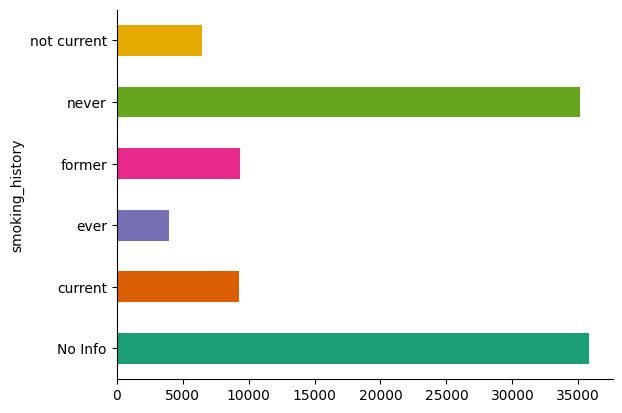

In [ ]:
# @title smoking_history

from matplotlib import pyplot as plt
import seaborn as sns
diabetes_data.groupby('smoking_history').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
diabetes_data.shape

(100000, 9)

In [ ]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score


In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['gender']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(diabetes_data[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded1 = pd.concat([diabetes_data, encoded_df], axis=1)
df_encoded1.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
categorical_columns = ['smoking_history']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(diabetes_data[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded2 = pd.concat([diabetes_data, encoded_df], axis=1)
df_encoded2.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
# Get the common columns between df_encoded1, df_encoded2, and diabetes_data
common_columns = set(df_encoded1.columns).intersection(df_encoded2.columns).intersection(diabetes_data.columns)

# Drop common columns from df_encoded2
df_encoded2 = df_encoded2.drop(common_columns, axis=1)

# Concatenate the two encoded datasets along the columns axis
combined_df = pd.concat([df_encoded1, df_encoded2], axis=1)
combined_df.drop('smoking_history', axis=1, inplace=True)
combined_df.drop('gender', axis=1, inplace=True)





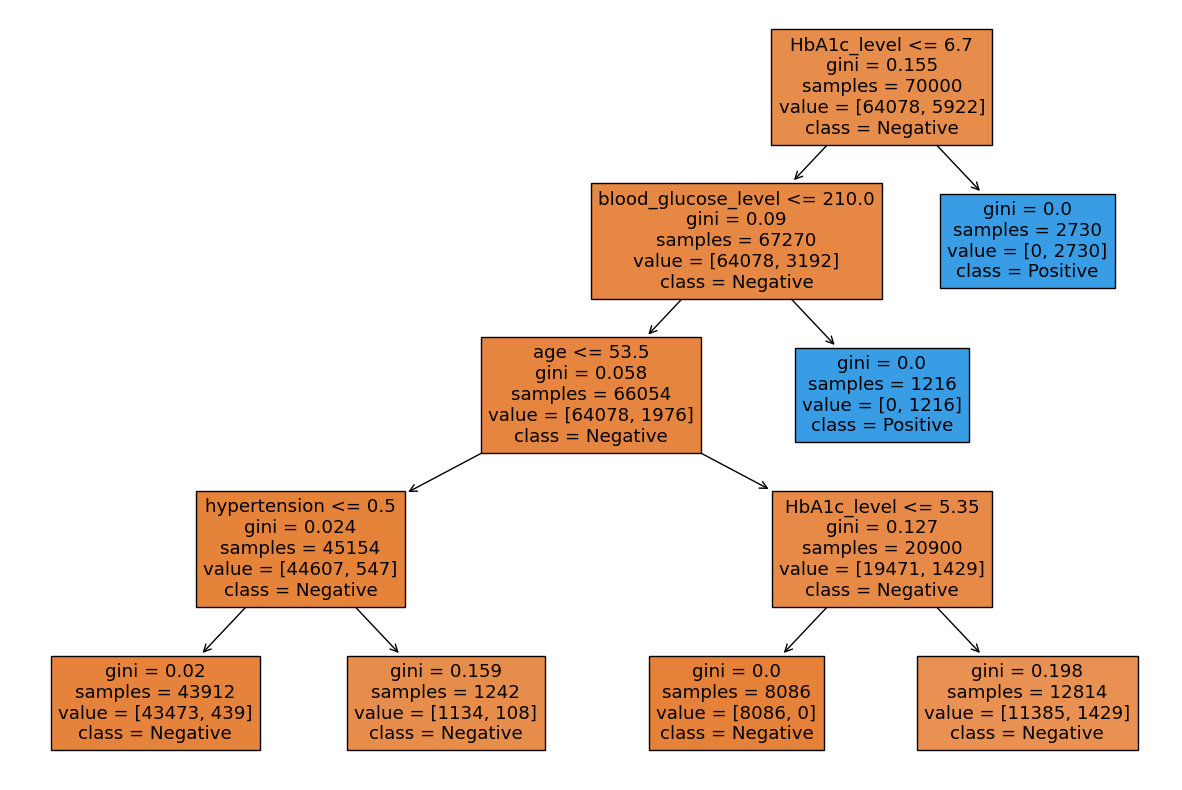

In [ ]:
X = combined_df.drop(columns=['diabetes'])
y = combined_df['diabetes']

# Create train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train the model using DecisionTree classifier
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf_tree, feature_names=X.columns, class_names=["Negative", "Positive"], filled=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict the labels for the test set using the decision tree classifier
y_pred_dt = clf_tree.predict(X_test)

# Compute accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Compute recall
recall_dt = recall_score(y_test, y_pred_dt)

# Compute precision for the decision tree classifier
precision_dt = precision_score(y_test, y_pred_dt)

# Compute F1 score
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Recall: {recall_dt}")
print(f"Precision: {precision_dt}")
print(f"F1 Score: {f1_dt}")


Decision Tree Metrics:
Accuracy: 0.9721
Recall: 0.6753297129557797
Precision: 1.0
F1 Score: 0.8062051400787219


In [ ]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=1)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict the labels for the test set
y_pred_rf = clf_rf.predict(X_test)

# Compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Compute recall
recall_rf = recall_score(y_test, y_pred_rf)

# Compute precision
precision_rf = precision_score(y_test, y_pred_rf)

# Compute F1 score
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")
print(f"F1 Score: {f1_rf}")


Random Forest Metrics:
Accuracy: 0.9704333333333334
Recall: 0.6920093095422808
Precision: 0.9504528502930207
F1 Score: 0.8008978675645342


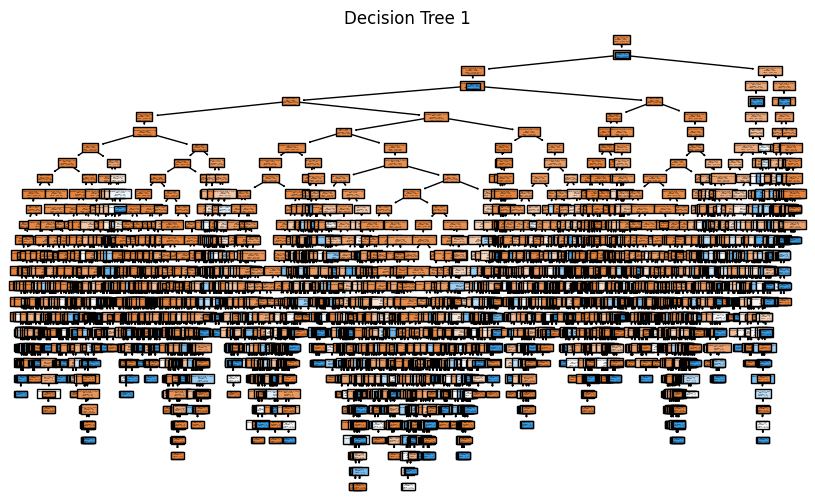

KeyboardInterrupt: 

In [ ]:
from sklearn import tree

# Specify the number of trees to visualize
num_trees_to_visualize = 3  # You can adjust this as needed

# Visualize a subset of decision trees from the Random Forest
for i in range(num_trees_to_visualize):
    plt.figure(figsize=(10, 6))
    tree.plot_tree(clf_rf.estimators_[i], feature_names=X.columns, class_names=["Negative", "Positive"], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train the logistic regression model
logistic_model = LogisticRegression()  # Increase max_iter if needed for convergence
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.9585
Recall: 0.6152055857253685
Precision: 0.8624252311038608
F1 Score: 0.7181344804165724


In [ ]:
target_attribute = 'diabetes'
X = combined_df.drop(columns=[target_attribute])
Y = combined_df[target_attribute]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
recall_dt = recall_score(Y_test, y_pred_dt)
f1_dt = f1_score(Y_test, y_pred_dt)

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")